**Step 1: Install and Import Required Libraries**

In [19]:
!pip install pandas matplotlib scikit-learn tensorflow

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


**Step 2: Upload and Unzip Your Dataset**

In [2]:
from google.colab import files
import zipfile

uploaded = files.upload()

for file_name in uploaded.keys():
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall('/content')

print("Dataset extracted successfully.")


Saving age_detection.zip to age_detection.zip
Dataset extracted successfully.


**Optional: Checking if folders exist**

In [4]:
print("train folder exists:", os.path.exists('/content/train'))
print("test folder exists:", os.path.exists('/content/test'))

train folder exists: True
test folder exists: True


**Step 3: Load the CSV File**

In [5]:
df = pd.read_csv('/content/age_detection.csv')

In [6]:
df.head()

,file,age,split
0,train/18-20/0.jpg,18-20,train
1,train/18-20/1.jpg,18-20,train
2,train/18-20/2.jpg,18-20,train
3,train/18-20/3.jpg,18-20,train
4,train/18-20/4.jpg,18-20,train


**Step 4: Encode Age Labels**

In [7]:
le = LabelEncoder()
df['encoded_age'] = le.fit_transform(df['age'])

print("Age Classes:", le.classes_)

Age Classes: ['18-20' '21-30' '31-40' '41-50' '51-60']


**Step 5: Load and Preprocess Images**

In [8]:
image_size = (128, 128)
images = []
labels = []

for i, row in df.iterrows():
    img_path = os.path.join('/content', row['file'])  # Full path
    if os.path.exists(img_path):
        img = load_img(img_path, target_size=image_size)
        img = img_to_array(img) / 255.0
        images.append(img)
        labels.append(row['encoded_age'])
    else:
        print("Missing file:", img_path)

X = np.array(images)
y = to_categorical(labels)

print("Loaded images:", X.shape, "Labels:", y.shape)


Loaded images: (150, 128, 128, 3) Labels: (150, 5)


**Step 6: Split into Train & Validation Sets**

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("🟢 Train shape:", X_train.shape)
print("🔵 Validation shape:", X_val.shape)


🟢 Train shape: (120, 128, 128, 3)
🔵 Validation shape: (30, 128, 128, 3)


**Step 7: Build CNN Model**

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

**Step 8: Train the Model**

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8683 - loss: 0.4531 - val_accuracy: 0.3333 - val_loss: 1.8145
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 702ms/step - accuracy: 0.9025 - loss: 0.3954 - val_accuracy: 0.2333 - val_loss: 1.8608
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 748ms/step - accuracy: 0.9169 - loss: 0.3043 - val_accuracy: 0.3000 - val_loss: 1.8978
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 872ms/step - accuracy: 0.9827 - loss: 0.1976 - val_accuracy: 0.2667 - val_loss: 2.0843
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 803ms/step - accuracy: 0.9444 - loss: 0.1787 - val_accuracy: 0.3333 - val_loss: 2.2517
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 954ms/step - accuracy: 0.9806 - loss: 0.1206 - val_accuracy: 0.3333 - val_loss: 2.2399
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 781ms/step - accuracy: 0.9798 - loss: 0.0987 - val_accuracy: 0.3333 - val_loss: 2.2304
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 761ms/step - accuracy: 0.9425 - loss: 0.1387 - val_accuracy: 0.3667 - val_loss: 2.

**Step 9: Plot Accuracy**

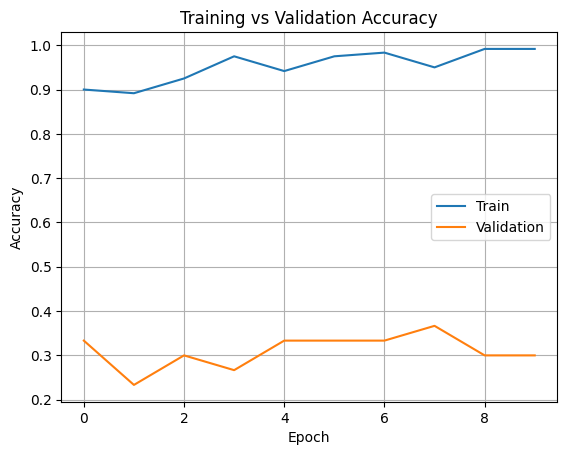

In [14]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Step 10: Evaluate Model Performance in More Detail**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
              precision    recall  f1-score   support

       18-20       0.50      0.33      0.40         6
       21-30       0.38      0.50      0.43         6
       31-40       0.33      0.29      0.31         7
       41-50       0.20      0.25      0.22         4
       51-60       0.14      0.14      0.14         7

    accuracy                           0.30        30
   macro avg       0.31      0.30      0.30        30
weighted avg       0.31      0.30      0.30        30



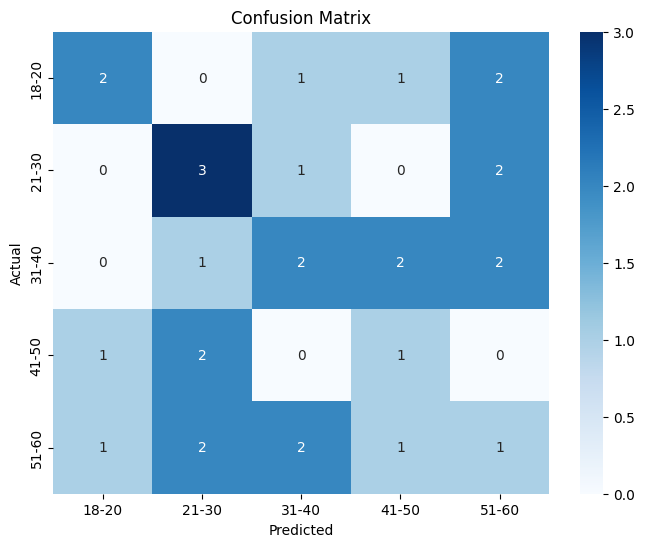

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict classes
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Step 11: Visualize Model Predictions on Random Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


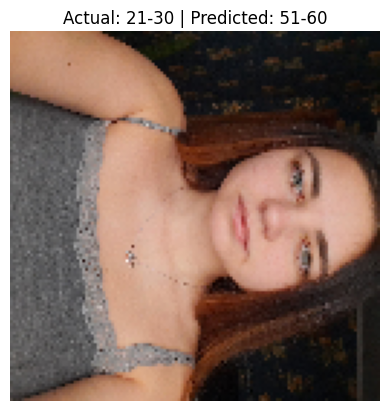

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


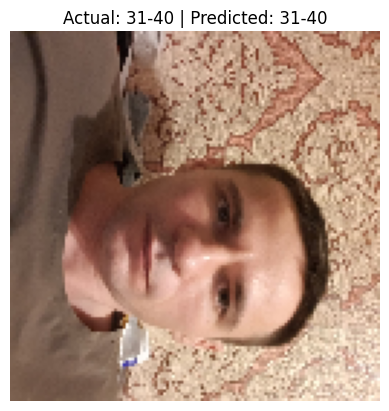

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


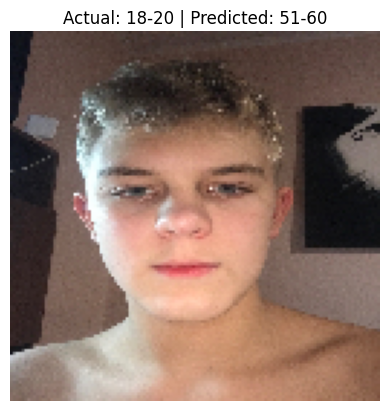

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


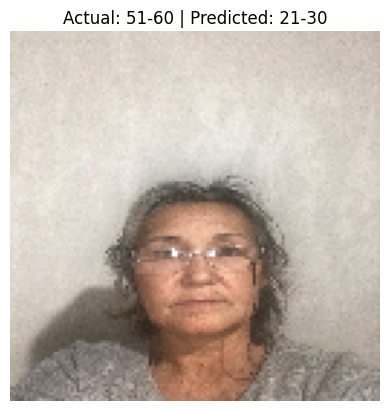

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


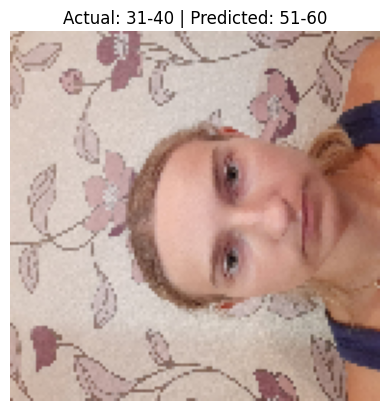

In [16]:
import random

indices = random.sample(range(len(X_val)), 5)
for i in indices:
    img = X_val[i]
    true_label = le.classes_[np.argmax(y_val[i])]
    pred_label = le.classes_[np.argmax(model.predict(img[np.newaxis, ...]))]

    plt.imshow(img)
    plt.title(f"Actual: {true_label} | Predicted: {pred_label}")
    plt.axis('off')
    plt.show()

**Step 12: Save & Export Label Encoder**

In [17]:
import pickle

with open('/content/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("Label encoder saved.")


Label encoder saved.


**Step 13: Convert to TFLite / ONNX for Mobile/Web Deployment**

In [19]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('/content/age_group_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TFLite model ready for mobile apps!")

Saved artifact at '/tmp/tmpzl32zlpb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138576302954768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138576302955728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138576302955344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138576302958608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138576302957840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138576302959568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138576302959376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138576302959952: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model ready for mobile apps!


**Step 14: Save the Model**

In [20]:
model.save('/content/age_group_classifier.h5')
print("Model saved successfully!")

Model saved successfully!


**Final (Download the Model)**

In [22]:
from google.colab import files
files.download('/content/age_group_classifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>